## Anomaly detection from daily average temperatures

* Date Range: 1979 - 2013 (35 years)
* Data: Daily average temperatures (NCEP-2 reanalysis data) for entire world (94 * 192 grid)
* Procedure: For a particular day and a particular location, you have an anomaly if the temperature falls beyond the (1, 99)th percentile limits of the normal distribution defined by the long term means and standard deviation for that particular day. 


In [1]:
%load_ext autoreload
%autoreload 2

### Step-1

* import necessary packages
* all necessary code has been saved in ``` detect_anoms.py ```

In [2]:
import matplotlib
%matplotlib inline
import detect_anoms as anom

### Step-2

* Load the data
* Data is stored in netcdf file format (.nc files) in the data folder
* ``` load_data() ``` function takes the start_year and end_year arguments, and loads the temperatures for all the world in the time range of (start_year, end_year)
* For this demonstration, assume we are collecting data for the time range (1979, 2013) which gives 35 years of information
* Your ```all_data``` variable will be a numpy array with the dimensions (35, 365, 94, 192), where 
   - 35 = number of years under consideration
   - 365 = number of days in each year (ignores leap year day)
   - 94, 192 = dimensions of the spatial grid

In [3]:
start_year = 1979
end_year = 2013
folder_name = '../data/'
all_data = anom.load_data(folder_name, start_year, end_year)

# you can verify the dimensions using the following print statement
print(f'Dimensions of the data = {all_data.shape}')

Finished loading data into memory...
Dimensions of the data = (35, 365, 94, 192)


### Step-3

#### Visualize 

* Pick a random day number (0-365) and random year number (0-35) and visualize the results on a map using 
  ``` plot_data()``` function
* ``` plot_data``` takes two arguments - the dataset and colormap
* Lets select day 200 for the year 2003 

/mnt/7daae28e-00d7-4546-a4a2-afba5721b3b0/playground/climate-anomaly-detection/anom-detect/detect_anoms.py:83: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  llcrnrlon=0,urcrnrlon=360,resolution='c')#Basemap(resolution='l')


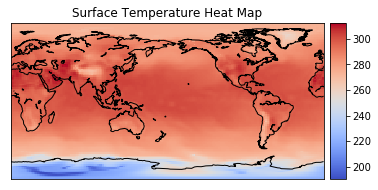

In [4]:
day_number = 200
year_number = 24 # (this is equivalent to 2003 - 1979)
anom.plot_heatmap(all_data, day_number, year_number)

### Step-4

#### Detect some anomalies

* Detecting anomalies for the entire dataset is time taking
* Instead, we will focus on demonstrating the results by identifying one anomaly - European Heat Wave of 2010
* The European Heat Wave occured roughly in the middle of July 
   - Let us assume this approximates to days number 193 - 198 out of 365

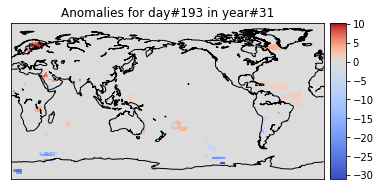

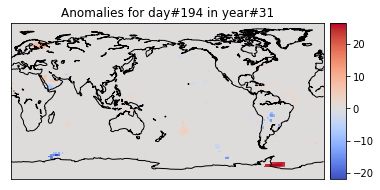

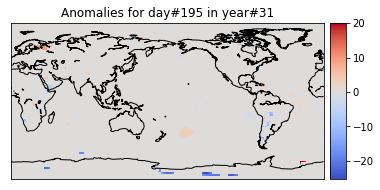

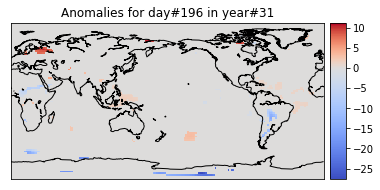

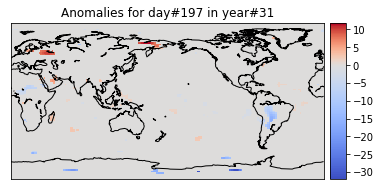

In [7]:
for i in range(193, 198):
    anom.detect_anomalies(all_data, i, 31, 0.99)